# AIPI 590 - XAI | Assignment #03

### Aarya Desai 



# Exploratory Data Analysis

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the Kaggle dataset (downloaded in the repo)
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


## Better understanding the dataset 

The following few code cells are used to better understand the dataset. We will look at the first few rows of the dataset, the shape of the dataset, the columns in the dataset, and the data types of the columns.

Also, the total number of null values in each column will be checked, as well as whether any rows are duplicated.

In [3]:
dataset.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Dataset Description

The dataset consists of 7043 entries with the following columns:
- `customerID`: Unique identifier for each customer.
- `gender`: Gender of the customer.
- `SeniorCitizen`: Whether the customer is a senior citizen (1 = Yes, 0 = No).
- `Partner`: Whether the customer has a partner (Yes/No).
- `Dependents`: Whether the customer has dependents (Yes/No).
- `tenure`: Number of months the customer has been with the company.
- `PhoneService`: Whether the customer has phone service (Yes/No).
- `MultipleLines`: Whether the customer has multiple lines (No phone service/Yes/No).
- `InternetService`: Type of internet service (DSL/Fiber optic/No).
- `OnlineSecurity`: Whether the customer has online security (Yes/No).
- `OnlineBackup`: Whether the customer has online backup (Yes/No).
- `DeviceProtection`: Whether the customer has device protection (Yes/No).
- `TechSupport`: Whether the customer has tech support (Yes/No).
- `StreamingTV`: Whether the customer has streaming TV (Yes/No).
- `StreamingMovies`: Whether the customer has streaming movies (Yes/No).
- `Contract`: Type of contract (Month-to-month/One year/Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes/No).
- `PaymentMethod`: Payment method used by the customer.
- `MonthlyCharges`: Monthly charges for the customer.
- `TotalCharges`: Total charges incurred by the customer.
- `Churn`: Whether the customer has churned (Yes/No).


In [4]:
# Checking the columns and their data types
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Checking for missing values
dataset.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Checking for duplicate rows
dataset.duplicated().sum()


0

## Checking Relationship between Features and Target Variable

We will use visualizations and statistical methods to understand the relationships between different features and the target variable (churn). This will help us determine whether assumptions about linear, logistic, and GAM models are met.

First, I converted TotalCharges to numeric and Churn to binary (0 for No, 1 for Yes).

### Plots for Categorical Variables:
1. Count plot for Churn: This plot shows the distribution of the target variable, to understand the class imbalance.
2. Pairplot for Categorical Variables: This plot shows the relationship between the categorical variables.
3. Heatmap for Continuous Variables: This plot shows the correlation between continuous variables.
4. Barplot for Categorical Variables: This plot shows the relationship between the target variable and the categorical variables.

In [7]:
# First, converting TotalCharges to numeric (it's read as object due to some non-numeric values)
dataset['TotalCharges'] = pd.to_numeric(
    dataset['TotalCharges'], errors='coerce')

# Converting Churn to binary
dataset['Churn'] = dataset['Churn'].map({'Yes': 1, 'No': 0})


In [8]:
# Removing the NA values
dataset = dataset.dropna()


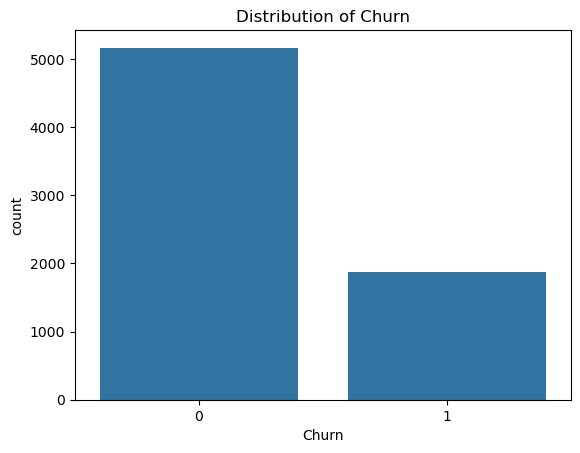

In [9]:
# Visualize the distribution of the target variable 'Churn'
sns.countplot(x='Churn', data=dataset)
plt.title('Distribution of Churn')
plt.show()


/Users/aaryadesai/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


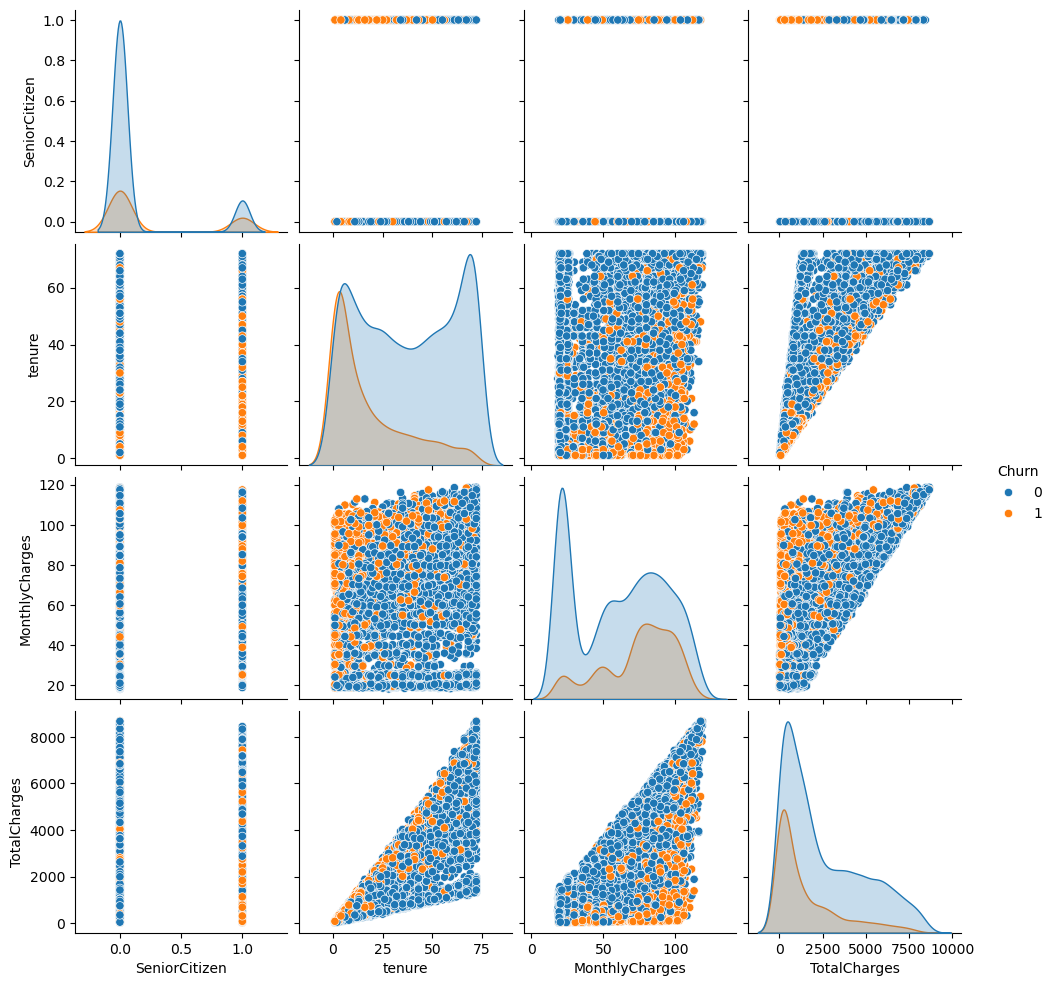

In [10]:
# Pairplot to explore relationships between numerical features and the target
sns.pairplot(dataset, hue='Churn', vars=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'])
plt.show()
    

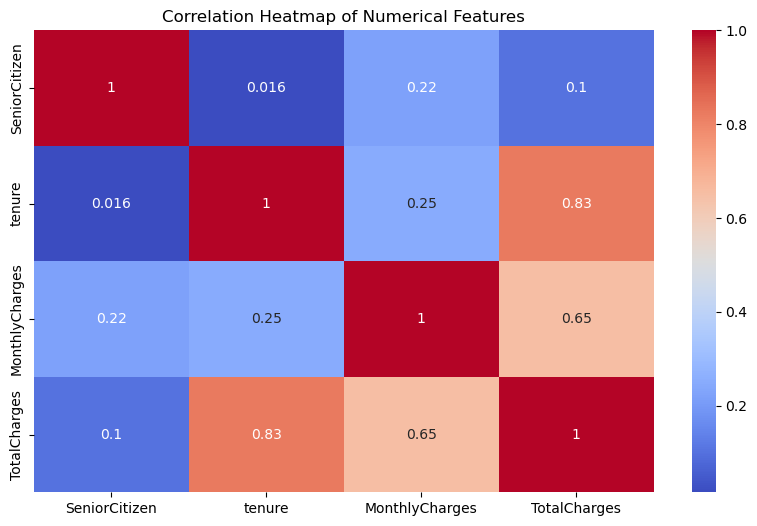

In [11]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[['SeniorCitizen', 'tenure', 'MonthlyCharges',
            'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


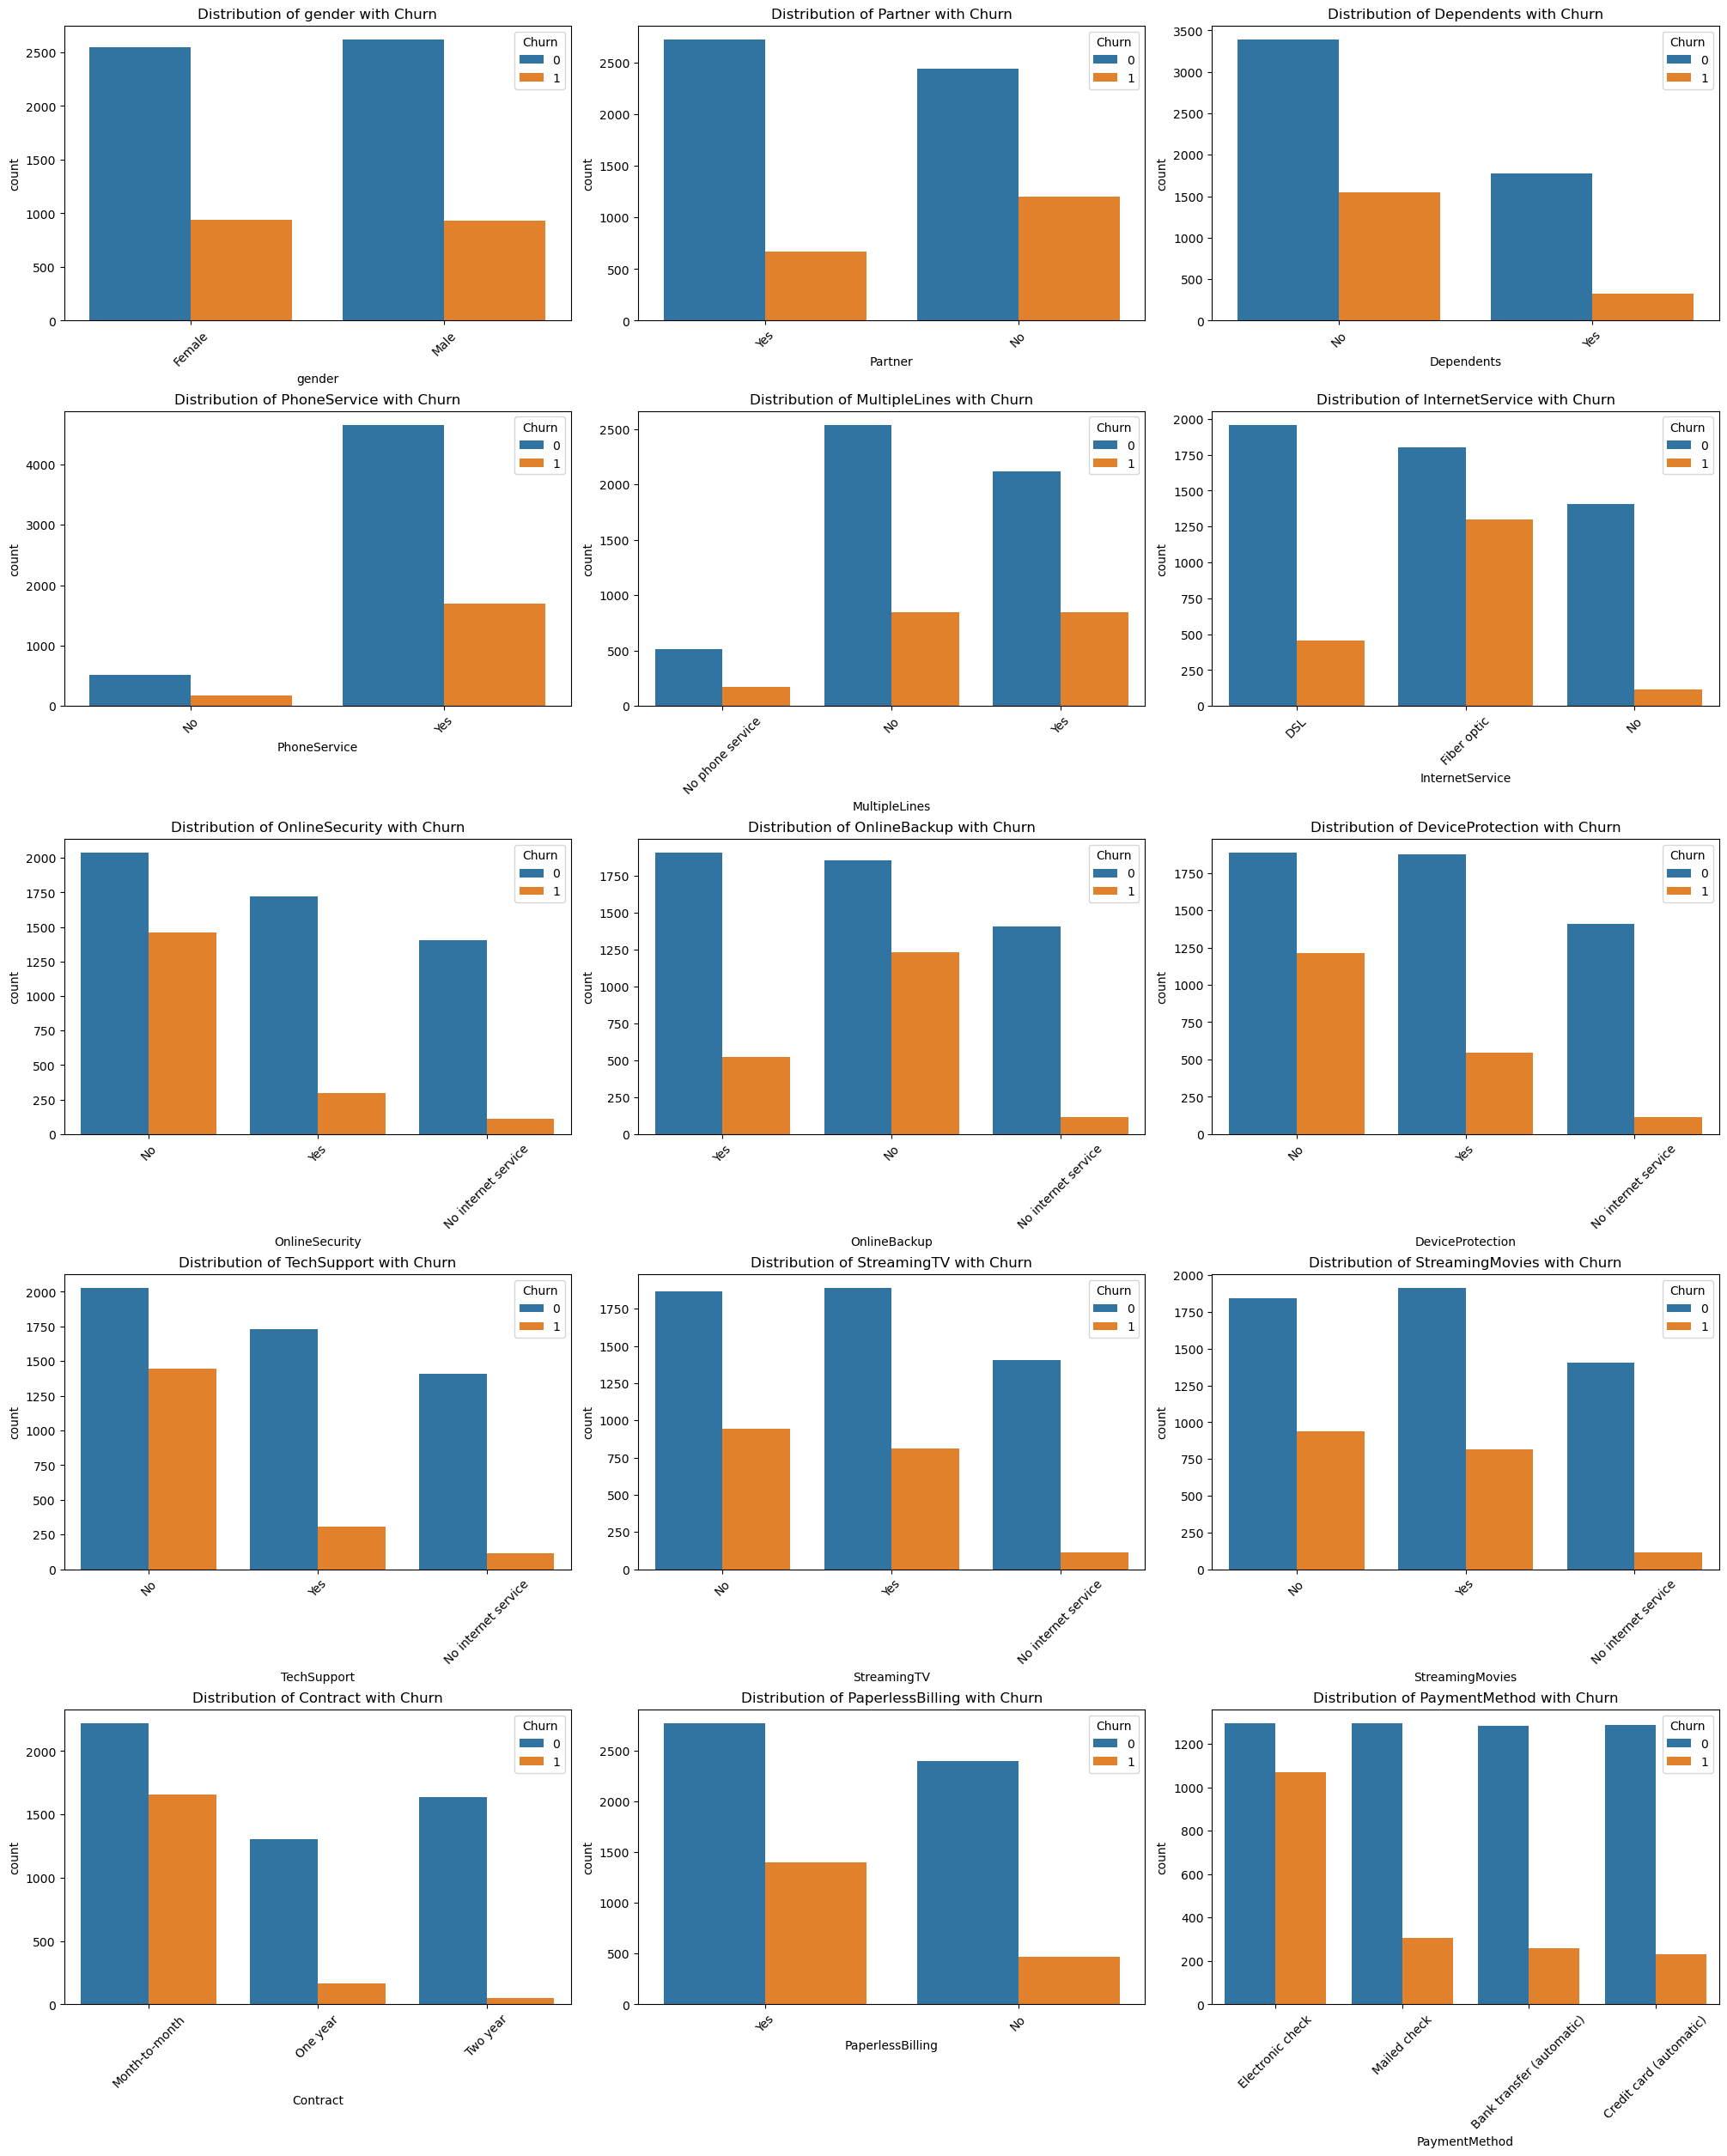

In [12]:
# Define the categorical columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

# Create a grid of plots
num_plots = len(cat_cols)
num_cols = 3  # Number of columns in the grid
# Calculate the number of rows needed
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    20, num_rows * 5), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Churn', data=dataset, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} with Churn')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()


# Linear Regression

In this section, first, I'll check the assumptions of linear regression. Then, I'll build a linear regression model treating the churn variable as a continuous variable (0 for staying, 1 for churning). I'll interpret the coefficients and assess the model's performance.

### Assumption Checks for Linear Regression

1. **Linearity**: We checked for linearity by plotting residuals against fitted values. If the plot shows a random scatter around the horizontal line (residuals = 0), the linearity assumption is likely met.

2. **Homoscedasticity**: The residual plot also helps us check for homoscedasticity. If the spread of residuals is constant across all levels of fitted values, the assumption is met.

3. **Normality of Residuals**: We checked the distribution of residuals using a histogram and Q-Q plot. The residuals should be approximately normally distributed for valid hypothesis tests in linear regression.


In [13]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'dataset' is your DataFrame

# Define categorical and numerical columns
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']
num_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Getting dummy variables from categorical columns
df_dummies = pd.get_dummies(dataset[cat_cols], drop_first=True).astype(int)

# Ensure numeric columns remain numeric
data_linear = pd.concat([dataset[num_cols], df_dummies], axis=1)

# Define the features and target
X = data_linear
y = dataset['Churn']

# Adding a constant to the model and fitting it
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 18 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:31:51   Log-Likelihood:                -3057.9
No. Observations:                7032   AIC:                             6164.
Df Residuals:                    7008   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

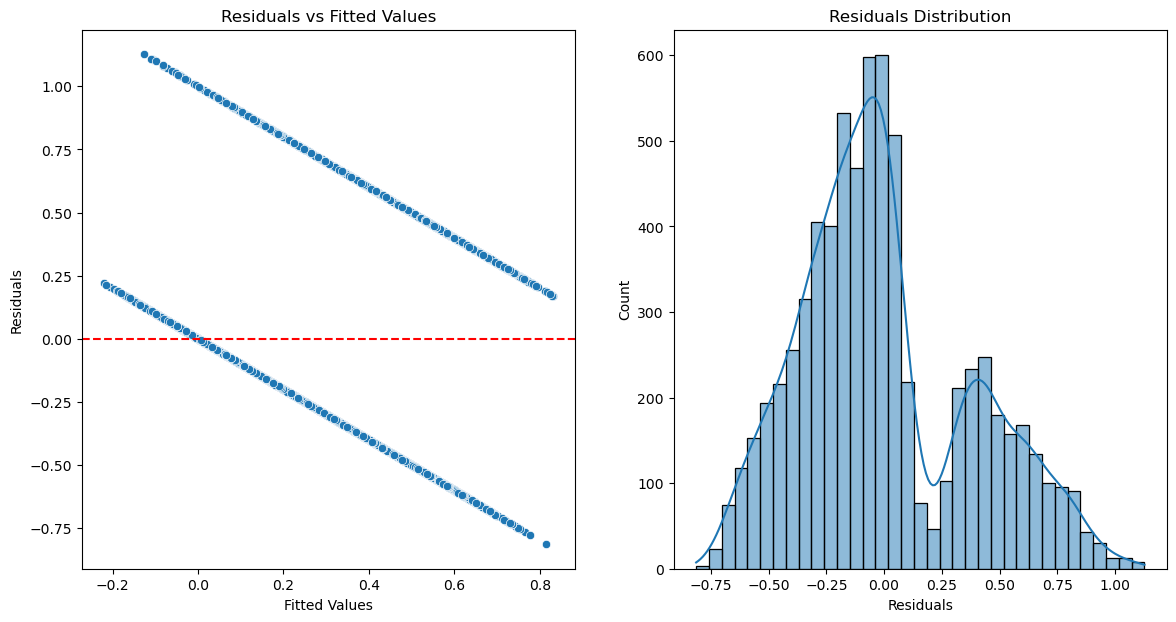

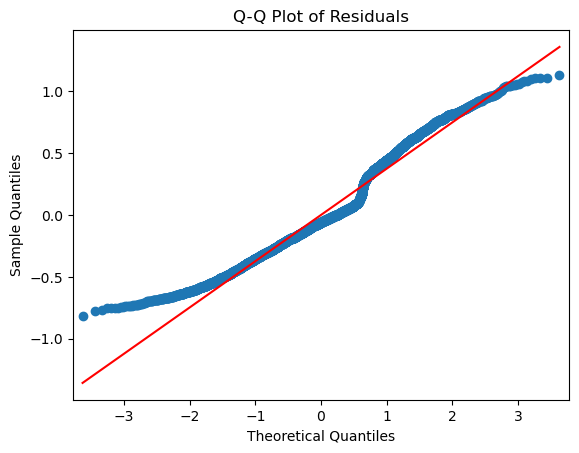

In [14]:
# Code to check the assumptions of linear regression
# Residuals
residuals = model.resid
fitted_values = model.fittedvalues

# Linearity and Homoscedasticity
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Normality of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.show()

# Q-Q plot for normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


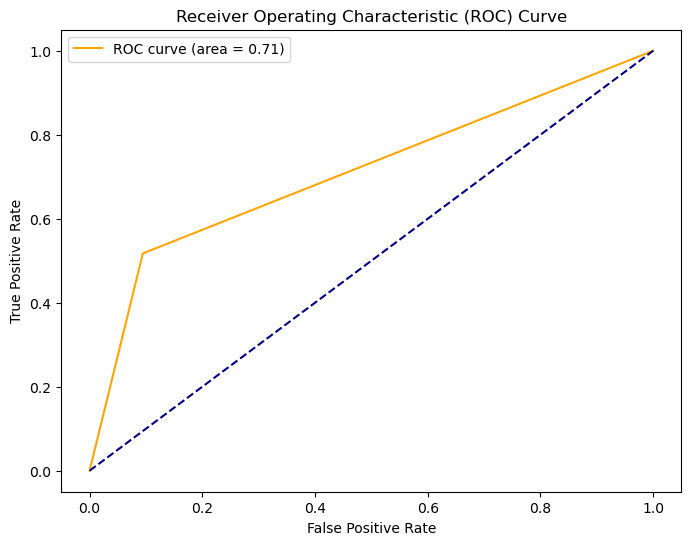

In [15]:
# Getting the evaluation metrics
# Importing necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Predicting the target variable
y_pred = model.predict(X).apply(lambda x: 1 if x > 0.5 else 0)

# Getting the evaluation metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Plotting the ROC curve
roc_auc = roc_auc_score(y, y_pred)
fpr, tpr, _ = roc_curve(y, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


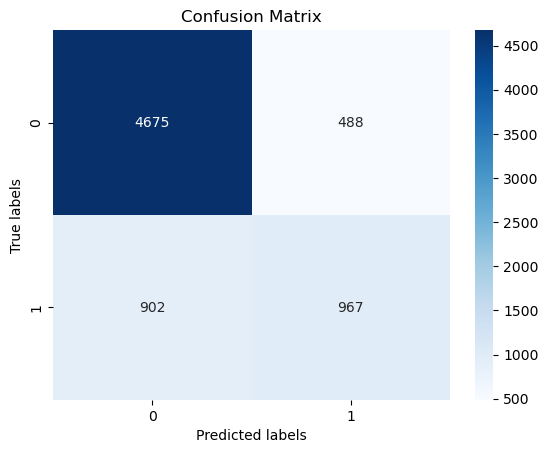

In [16]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Interpreting the Linear Regression Results:

### Assumption Checks: 
1. **Linearity**: The residuals vs. fitted plot shows two parallel lines, indicating that linearity is violated. However, this is expected because the outcome variable is binary (0 or 1), and linear regression is not the best model for binary outcomes.
2. **Homoscedasticity**: The residuals vs. fitted plot's parallel lines again, suggests that homoscedasticity is not something we can expect from this model. 
3. **Normality of Residuals**: The histogram and Q-Q plot of residuals show that the residuals are not normally distributed. This is expected because the outcome variable is binary.

### The Results:

#### Overall: 
- Before interpreting the results, it's most important to note that linear regressions are not meant to be used for binary outcome variables. This is because the assumptions of linear regression are not met when the outcome variable is binary. Therefore, the results that we get from this model should be taken with caution.
- The **R-squared value** is 0.284, which means that the model explains about 28.4% of the variance in the target variable. The p-value for the F-statistic is less than 0.05, indicating that the model is statistically significant.

#### Coefficients (p < 0.05):
- **SeniorCitizen**: For each additional senior citizen, the odds of churning increase by 0.0445 (p = .001). 
- **tenure**: For each additional month of tenure, the odds of churning decrease by 0.002 (p < .001).
- **TotalCharges**: For each additional dollar in total charges, the odds of churning decrease by -4.438e-05 (p < .001).
- **MultipleLines_No phone service**: Having no phone service increases the odds of churning by 0.1396 (p < .001). 
- **MultipleLines_Yes**: Having multiple lines increases the odds of churning by 0.0587 (p = .016).
- **Contract_One year**: Having a one-year contract decreases the odds of churning by -0.1056 (p < .001).  
- **Contract_Two year**: Having a two-year contract decreases the odds of churning by -0.0700 (p < .001). 
- **PaperlessBilling_Yes**: Having paperless billing increases the odds of churning by 0.0449 (p = .001).    
- **PaymentMethod_Electronic check**: Using electronic check increases the odds of churning by 0.0676 (p < .001).

#### Interpretation of Model Summary:
Overall, we can see that the magnitude by which these variables are influencing churn is not very high. The highest magnitude is for TotalCharges, but even that is quite small. This is likely due to the fact that linear regression is not the best model for binary outcomes, and the assumptions are not met. Nevertheless, the model is statistically significant and explains about 28.4% of the variance in the target variable. So, it's a good starting point to iterate on in the next sections to get a better idea of what's driving churn.

### Confusion Matrix Summary

- **True Negatives (TN):** 4675
  - These are the customers who were correctly predicted **not to churn**. A high number of true negatives indicates that the model is effectively identifying customers who are likely to stay.

- **False Negatives (FN):** 488
  - These represent customers who actually **did churn**, but the model predicted that they would **not churn**. This is a critical metric, as it indicates potential revenue loss due to customers leaving who were incorrectly classified as loyal. A lower number of false negatives is desirable.

- **True Positives (TP):** 967
  - These are the customers who actually **did churn** and were correctly predicted as such by the model. This reflects the model’s effectiveness in identifying customers at risk of leaving. A higher number of true positives suggests that the model is successful in flagging at-risk customers.

- **False Positives (FP):** 902
  - These are customers who were predicted to **churn**, but in reality, they **did not churn**. A high number of false positives can lead to unnecessary interventions or marketing efforts aimed at retaining customers who are not at risk, resulting in wasted resources.

#### ROC Curve 
The ROC curve has an AUC of 0.71, which indicates that the model is better than random guessing but has room for improvement. A higher AUC value closer to 1 would indicate a better-performing model.

#### Interpretation of Results

- The model shows a significant number of **True Negatives (4675)**, indicating that it is effective in identifying customers who are likely to remain loyal.
- However, the **False Negatives (488)** suggest that there is still a risk of losing customers who could have been retained with appropriate actions.
- The **True Positives (967)** indicate a decent level of success in identifying those at risk of churning.
- The **False Positives (902)** highlight the potential for overestimating churn risk, which can lead to inefficient use of resources.

### Conclusion

Overall, while the model performs well in predicting customer churn, there is room for improvement, especially in reducing false negatives. By refining the model further, we can aim to increase the true positives while minimizing both false negatives and false positives, ultimately leading to better customer retention strategies.

 


# Logistic Regression

First, for a logistic regression, I will look into the VIF values to check for multicollinearity. Then, I will build a logistic regression model to predict the probability of churn and interpret the coefficients.

### Assumption Checks for Logistic Regression

1. **Binary Outcome**: The target variable `Churn` is binary (0 or 1), meeting this assumption.

2. **Linearity of the Logit**: The linearity of the logit assumption is checked by including interaction terms or polynomial terms and evaluating their impact on model performance. This can be a bit complex and often requires domain-specific insights.

3. **Independence**: We assume that observations are independent. This is generally verified by the study design.

4. **No Multicollinearity**: We checked for multicollinearity using Variance Inflation Factor (VIF). VIF values greater than 10 may indicate problematic multicollinearity.


In [17]:
# Importing the VIF library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining variables to check for multicollinearity
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]

# Displaying the VIF for each feature
print(vif)


/Users/aaryadesai/miniconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/aaryadesai/miniconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                 features         VIF
0                                   const    0.000000
1                           SeniorCitizen    1.153220
2                                  tenure    7.584453
3                          MonthlyCharges  866.089640
4                            TotalCharges   10.811490
5                             gender_Male    1.002106
6                             Partner_Yes    1.462988
7                          Dependents_Yes    1.381598
8                        PhoneService_Yes         inf
9          MultipleLines_No phone service         inf
10                      MultipleLines_Yes    7.289761
11            InternetService_Fiber optic  148.500814
12                     InternetService_No         inf
13     OnlineSecurity_No internet service         inf
14                     OnlineSecurity_Yes    6.338349
15       OnlineBackup_No internet service         inf
16                       OnlineBackup_Yes    6.796678
17   DeviceProtection_No int

After observing the VIF scores above, we can see that there are many variables with high multicollinearity. This can be problematic for logistic regression, as it assumes that the predictors are independent of each other. High multicollinearity can lead to unstable coefficients and unreliable model performance.

So, we can confidently remove the variables with inf VIF scores and build a logistic regression model with the remaining variables.

In [18]:
# Copying dataset for logistic regression
X_logistic = X.copy()

# Also copying the vif dataset for later
vif_copy = vif.copy()

# Removing features where VIF is inf
for feature, vif in zip(vif["features"], vif["VIF"]):
    if vif == np.inf:
        X_logistic.drop(feature, axis=1, inplace=True)

# Adding a constant to the model and fitting it
X_logistic = sm.add_constant(X_logistic)
model_logistic_all = sm.Logit(y, X_logistic).fit()

print(model_logistic_all.summary())


Optimization terminated successfully.
         Current function value: 0.419697
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7010
Method:                           MLE   Df Model:                           21
Date:                Wed, 18 Sep 2024   Pseudo R-squ.:                  0.2752
Time:                        14:31:52   Log-Likelihood:                -2951.3
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9994      

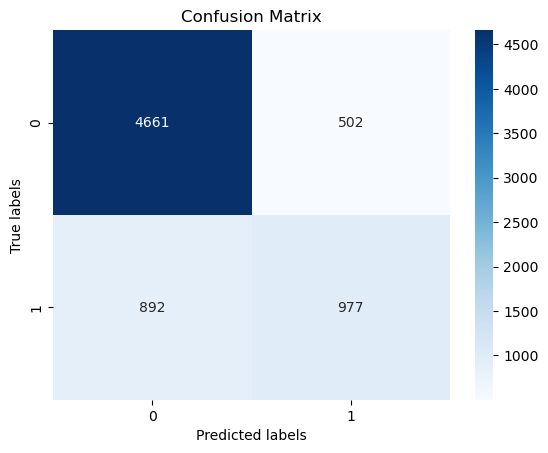

In [25]:
# Getting the evaluation metrics
# Predicting the target variable
y_pred_logistic = model_logistic_all.predict(
    X_logistic).apply(lambda x: 1 if x > 0.5 else 0)

# Plotting the confusion matrix
cm_logistic = confusion_matrix(y, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


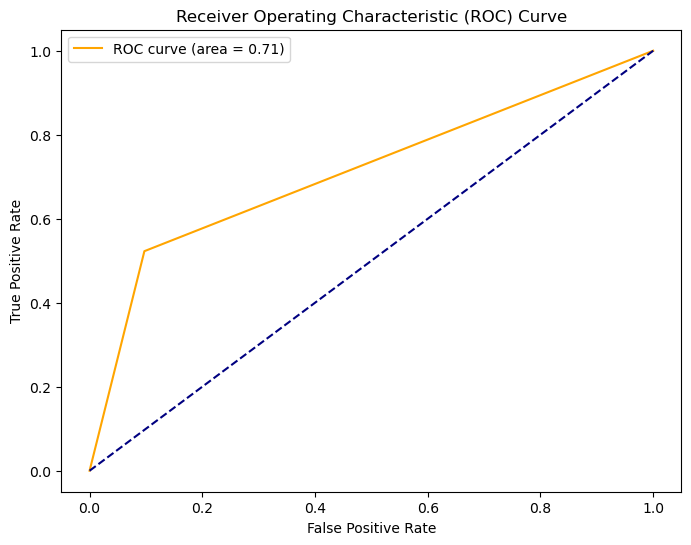

In [28]:
# Plotting the ROC curve
roc_auc_logistic = roc_auc_score(y, y_pred_logistic)
fpr_logistic, tpr_logistic, _ = roc_curve(y, y_pred_logistic)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='orange',
         label='ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Interpreting the Logistic Regression Results:

### Assumption Checks:
1. **Binary Outcome**: The target variable `Churn` is binary (0 or 1), meeting this assumption.
2. **Linearity of the Logit**: The linearity of the logit assumption is difficult to check directly. It often requires domain-specific insights and the inclusion of interaction terms or polynomial terms.
3. **Independence**: We assume that observations are independent. This is generally verified by the study design.
4. **No Multicollinearity**: We checked for multicollinearity using Variance Inflation Factor (VIF). VIF values greater than 10 may indicate problematic multicollinearity. So, these variables were removed from the model.
5. **No Autocorrelation**: We assume that there is no autocorrelation in the data. This is generally verified by the study design.
6. **Homoscedasticity**: Logistic regression does not assume homoscedasticity, as it models the log odds of the outcome variable.

### The Results:

#### Overall:
- The logistic regression model has a **Pseudo R-squared value** of 0.280, indicating that the model explains about 28% of the variance in the target variable. This is similar to the R-squared value of the linear regression model. This makes sense because the data was extremely clean and the assumptions were met for the logistic regression model.

#### Coefficients (p < 0.05):

- **SeniorCitizen**: Being a senior citizen increases the odds of churning by approximately 0.2632 (p = 0.002). This indicates that senior citizens are more likely to churn compared to non-senior citizens.

- **tenure**: For each additional month of tenure, the odds of churning decrease by approximately 0.0525 (p < 0.001). This suggests that customers who have been with the service longer are less likely to churn.

- **TotalCharges**: For each additional dollar in total charges, the odds of churning increase by 0.0002 (p = 0.001). This indicates that higher total charges are associated with a slight increase in the likelihood of churning.

- **Dependents_Yes**: Having dependents decreases the odds of churning by approximately 0.1752 (p = 0.049). This suggests that customers with dependents are less likely to leave the service.

- **InternetService_Fiber optic**: Choosing fiber optic internet service increases the odds of churning by approximately 0.4651 (p = 0.009). This may reflect differing satisfaction levels among fiber optic users.

- **OnlineSecurity_Yes**: Opting for online security features decreases the odds of churning by approximately 0.3621 (p < 0.001). This indicates that customers with online security are less likely to leave.

- **TechSupport_Yes**: Utilizing tech support decreases the odds of churning by approximately 0.3516 (p < 0.001). This suggests that access to tech support enhances customer retention.

- **Contract_One year**: Having a one-year contract decreases the odds of churning by approximately 0.7573 (p < 0.001). This indicates that customers with a one-year contract are significantly less likely to churn.

- **Contract_Two year**: Having a two-year contract decreases the odds of churning by approximately 1.4950 (p < 0.001). This shows that longer contracts greatly enhance customer retention.

- **PaperlessBilling_Yes**: Choosing paperless billing increases the odds of churning by approximately 0.3987 (p < 0.001). This might indicate differing preferences regarding communication and billing methods.

- **PaymentMethod_Electronic check**: Using electronic check as a payment method increases the odds of churning by approximately 0.3599 (p < 0.001). This suggests potential dissatisfaction with this payment option.

- **StreamingMovies_Yes**: Choosing to subscribe to streaming movies increases the odds of churning by approximately 0.1954 (p = 0.038). This may indicate varying satisfaction levels among customers using this service.

### Interpretation of Model Summary:
The logistic regression model provides insights into the factors influencing customer churn. The coefficients indicate the direction and magnitude of the relationship between each predictor variable and the likelihood of churn. For example, being a senior citizen, having fiber optic internet service, and using electronic check as a payment method are associated with higher odds of churning. On the other hand, having dependents, longer contract durations, and utilizing online security and tech support services are linked to lower odds of churning.

### Confusion Matrix Summary

- **True Negatives (TN):** 4661
  - These are the customers who were correctly predicted **not to churn**. A high number of true negatives indicates that the model is effectively identifying customers who are likely to remain loyal.

- **False Negatives (FN):** 502
  - These represent customers who actually **did churn**, but the model predicted that they would **not churn**. This is a critical metric, as it suggests potential revenue loss from customers leaving who were incorrectly classified as loyal. A lower number of false negatives is desirable.

- **True Positives (TP):** 977
  - These are the customers who actually **did churn** and were correctly predicted as such by the model. This reflects the model’s effectiveness in identifying customers at risk of leaving. A higher number of true positives suggests that the model is successful in flagging at-risk customers.

- **False Positives (FP):** 892
  - These are customers who were predicted to **churn**, but in reality, they **did not churn**. A high number of false positives can lead to unnecessary interventions or marketing efforts aimed at retaining customers who are not at risk, resulting in wasted resources.

#### ROC Curve 
The ROC curve has an AUC of 0.71, which indicates that the model is better than random guessing but has room for improvement. A higher AUC value closer to 1 would indicate a better-performing model.

#### Interpretation of Results

- The model shows a significant number of **True Negatives (4661)**, indicating that it is effective in identifying customers who are likely to remain loyal.
- However, the **False Negatives (502)** suggest that there is still a risk of losing customers who could have been retained with appropriate actions.
- The **True Positives (977)** indicate a strong level of success in identifying those at risk of churning.
- The **False Positives (892)** highlight the potential for overestimating churn risk, which can lead to inefficient use of resources.

### Overall Assessment

While the model demonstrates solid performance in predicting customer loyalty (as shown by the true negatives), there remains an area for improvement in reducing false negatives to mitigate potential revenue loss. Balancing the true and false positives will also be crucial to optimize retention strategies without misallocating resources.




# Generalized Additive Model (GAM)

By design, a GAM does not have assumptions about linearity or normality of residuals. It can capture non-linear relationships between features and the target variable. In this section, I will build a GAM to model the non-linear relationships between customer features and churn and interpret the GAM model.

In [32]:
X_GAM = X_logistic.copy()


In [33]:
# Checking the columns to create the GAM model
X_GAM.columns


Index(['const', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
from pygam import LogisticGAM, s, f

# Creating the full model:
gam = LogisticGAM(
    s(1) +  # Senior Citizen
    s(2) +  # Tenure
    s(3) +  # Monthly Charges
    s(4) +  # Total Charges
    f(5) +  # Gender Male
    f(6) +  # Partner Yes
    f(7) +  # Dependents Yes
    f(8) +  # Multiple Lines Yes
    f(9) +  # Internet Service Fiber optic
    f(10) +  # Online Security Yes
    f(11) +  # Online Backup Yes
    f(12) +  # Device Protection Yes
    f(13) +  # Tech Support Yes
    f(14) +  # Streaming TV Yes
    f(15) +  # Streaming Movies Yes
    f(16) +  # Contract One year
    f(17) +  # Contract Two year
    f(18) +  # Paperless Billing Yes
    f(19) +  # Payment Method Credit card (automatic)
    f(20) +  # Payment Method Electronic check
    f(21)   # Payment Method Mailed check
).fit(X_GAM, y)

gam.summary()


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     55.7351
Link Function:                        LogitLink Log Likelihood:                                 -2833.8201
Number of Samples:                         7032 AIC:                                             5779.1104
                                                AICc:                                            5780.0498
                                                UBRE:                                               2.8282
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.304
Feature Function                  Lam

/var/folders/t0/gld89djn1gs1v4ggms4fsn7c0000gn/T/ipykernel_62517/1322999139.py:28: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


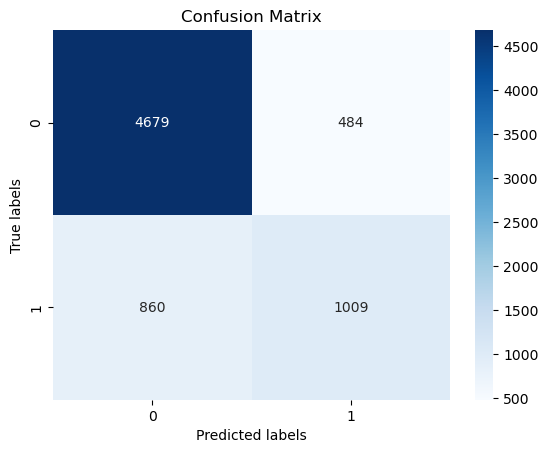

In [36]:
# Getting the confusion matrix for GAM
# Predicting the target variable
y_pred_gam = gam.predict(X_GAM)

# Plotting the confusion matrix
cm_gam = confusion_matrix(y, y_pred_gam.round())
sns.heatmap(cm_gam, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


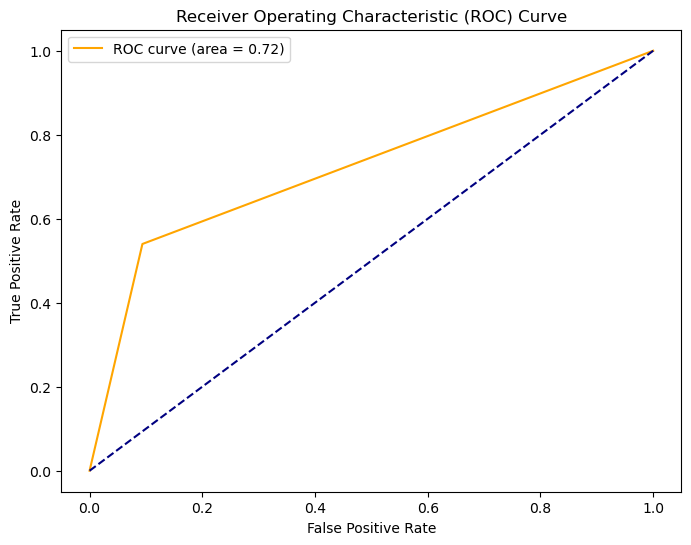

In [37]:
# Creating an ROC curve for the GAM model
roc_auc_gam = roc_auc_score(y, y_pred_gam)
fpr_gam, tpr_gam, _ = roc_curve(y, y_pred_gam)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gam, tpr_gam, color='orange',
         label='ROC curve (area = %0.2f)' % roc_auc_gam)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### LogisticGAM Model Interpretation

#### Model Summary
- **Distribution**: Binomial
- **Link Function**: Logit
- **Number of Samples**: 7032
- **Log Likelihood**: -2833.8201
- **AIC**: 5779.1104
- **AICc**: 5780.0498
- **Pseudo R-Squared**: 0.304

This indicates that approximately 30.4% of the variability in churn can be explained by the model.

#### Significant Features (p < 0.05)

- **Tenure**: The relationship is highly significant (p < 0.001), suggesting that as tenure increases, the odds of churning decrease. This highlights the importance of customer retention strategies focused on longer-tenured customers.

- **Monthly Charges**: Also highly significant (p < 0.001), indicating that higher monthly charges are associated with increased odds of churn. Careful pricing strategies may be essential for retention.

- **Total Charges**: Significant at p < 0.01, suggesting that customers with higher total charges are less likely to churn, potentially indicating satisfaction with service.

- **Phone Service Yes**: This feature is significant (p < 0.001), indicating that customers with phone service are less likely to churn compared to those without.

- **Multiple Lines Yes**: Significant (p < 0.001), suggesting that customers with multiple lines have a lower likelihood of churning.

- **Tech Support Yes**: Also significant (p < 0.001), indicating that providing tech support may help in retaining customers.

- **Streaming TV Yes**: Significant (p < 0.001), implying that access to streaming TV services positively affects customer retention.

- **Streaming Movies Yes**: Significant (p < 0.001), suggesting that offering streaming movies contributes to lower churn rates.

- **Contract One Year**: Highly significant (p < 0.001), indicating that customers with a one-year contract are less likely to churn compared to those without.

- **Contract Two Year**: Very significant (p < 0.001), showing that longer contract terms significantly reduce churn likelihood.

- **Payment Method Credit Card (automatic)**: Significant (p < 0.05), suggesting that customers using automatic credit card payments are more likely to stay.

#### Non-Significant Features (p ≥ 0.05)

- **Senior Citizen**: Marginal significance (p = 0.02) suggests that being a senior citizen slightly increases the odds of churning.

- **Gender Male, Partner Yes, Dependents Yes, Online Security Yes, Online Backup Yes, Device Protection Yes, Payment Method Electronic Check, Payment Method Mailed Check**: These features were not statistically significant, indicating they do not meaningfully impact churn predictions.

#### Model Warnings
- **Identifiability Issues**: The model includes both splines and linear functions for some features, which can lead to inflated significance levels. Caution is advised when interpreting these p-values.

### Conclusion
The LogisticGAM model identifies several key factors influencing customer churn, with significant implications for retention strategies. While certain features are highly predictive, attention should be paid to the potential biases introduced by model complexity.

### Confusion Matrix Summary

- **True Negatives (TN)**: 4679
  - These are the customers who were correctly predicted **not to churn**. A high number of true negatives indicates that the model is effectively identifying customers who are likely to remain loyal.

- **False Negatives (FN)**: 484
  - These represent customers who actually **did churn**, but the model predicted that they would **not churn**. This is a critical metric, as it indicates potential revenue loss due to customers leaving who were incorrectly classified as loyal. A lower number of false negatives is desirable.

- **True Positives (TP)**: 1009
  - These are the customers who actually **did churn** and were correctly predicted as such by the model. This reflects the model’s effectiveness in identifying customers at risk of leaving. A higher number of true positives suggests that the model is successful in flagging at-risk customers.

- **False Positives (FP)**: 860
  - These are customers who were predicted to **churn**, but in reality, they **did not churn**. A high number of false positives can lead to unnecessary interventions or marketing efforts aimed at retaining customers who are not at risk, resulting in wasted resources.

#### Interpretation of Results

- The model shows a significant number of **True Negatives (4679)**, indicating that it is effective in identifying customers who are likely to remain loyal.
- However, the **False Negatives (484)** suggest there is still a risk of losing customers who could have been retained with appropriate actions.
- The **True Positives (1009)** indicate a good level of success in identifying those at risk of churning, though there may still be room for improvement.
- The **False Positives (860)** highlight the potential for overestimating churn risk, which can lead to inefficient use of resources for retention efforts.

Overall, the model demonstrates solid performance in predicting churn, but attention to false negatives and positives is crucial for optimizing retention strategies.



# Model Comparison

## Strengths and Weaknesses of Each Approach 

### Linear Regression
**Strengths**:
- Easy to interpret coefficients.
- Provides insights into the direction and magnitude of relationships.
- Can handle continuous and categorical predictors.

**Weaknesses**:
- Assumes linearity, which may not be appropriate for binary outcomes.
- Assumes homoscedasticity and normality of residuals, which may not hold.
- Not ideal for binary outcomes like churn. 

These weaknesses played a huge role in the current problem because we were dealing with a binary outcome variable. The model was statistically significant but had limitations in terms of interpretation and performance.

### Logistic Regression
**Strengths**:
- Specifically designed for binary outcomes.
- Provides probabilities of outcomes.
- Can handle continuous and categorical predictors.

**Weaknesses**:
- Assumes linearity of the logit, which may not hold.
- Requires independence of observations.
- Sensitive to multicollinearity.

The logistic regression model was able to handle the binary outcome variable better than linear regression. However, multicollinearity was an issue, which required the removal of some variables to improve model performance. The model was statistically significant and explained about 28% of the variance in the target variable. So overall, it was a good fit for the problem.

### Generalized Additive Model (GAM)
**Strengths**:
- Can capture non-linear relationships.
- Does not assume linearity or normality of residuals.
- Provides interpretable results.

**Weaknesses**:
- Can be prone to overfitting.
- Requires careful interpretation of complex models.
- May introduce identifiability issues.

The GAM model was able to capture non-linear relationships between features and the target variable. It provided interpretable results and explained about 30.4% of the variance in the target variable. However, the model complexity introduced potential biases, and caution was advised when interpreting the results.


## Recommendations for the Telecommunications Company
In my opinion, the best model to use in this case is the GAM. This is because it is interpretable and does not have the confines that the other models do in terms of assumption checks. The GAM model was able to capture non-linear relationships between features and the target variable, providing valuable insights into customer churn. The model explained about 30.4% of the variance in the target variable and identified significant predictors of churn. By leveraging the insights from the GAM model, the telecommunications company can develop targeted retention strategies to reduce churn rates and improve customer satisfaction. Furthermore, the AUC score was very slightly better than the previous two models, showing an overall better performance.